In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['Status', 'Message'])

In [3]:
df.head()

,Status,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df['Status'].value_counts()

ham     4825
spam     747
Name: Status, dtype: int64

In [6]:
df.loc[df['Status'] == 'spam', 'Status'] = 1
df.loc[df['Status'] == 'ham', 'Status'] = 0

In [7]:
df.head()

,Status,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df_x = df['Message']
df_y = df['Status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state=1)

In [10]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

3900 1672 3900 1672


# !!! Imp Text to features

### CountVectorizer

In [11]:
cv = CountVectorizer()

In [12]:
X_traincv = cv.fit_transform(['Hi how are you, how are you doing?', "Hey what's up", 'Wow cool tutorials'])

In [13]:
X_traincv.toarray()

array([[2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]], dtype=int64)

In [14]:
cv.get_feature_names()

['are',
 'cool',
 'doing',
 'hey',
 'hi',
 'how',
 'tutorials',
 'up',
 'what',
 'wow',
 'you']

In [15]:
cv1 = CountVectorizer()

In [16]:
X_traincv = cv1.fit_transform(X_train)

In [17]:
X_train_features = X_traincv.toarray()

### TF-IDF (Term Frequency-Inverse Document Frequency)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
cv = TfidfVectorizer(min_df=1, stop_words='english')

In [20]:
X_traincv = cv.fit_transform(['Hi how are you, how are you doing?', "Hey what's up", 'Wow cool tutorials'])

In [21]:
X_traincv.toarray()

array([[ 0.        ,  0.70710678,  0.        ,  0.70710678,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.57735027,  0.        ,  0.        ,  0.        ,  0.57735027,
         0.57735027]])

In [22]:
cv.get_feature_names()

['cool', 'doing', 'hey', 'hi', 'tutorials', 'wow']

In [23]:
cv1 = TfidfVectorizer(min_df=1, stop_words='english')

In [24]:
X_train_features = cv1.fit_transform(X_train)

In [25]:
X_train_features.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [26]:
cv1.inverse_transform(X_train_features[0])

[array(['new', 'years', 'plans'],
       dtype='<U34')]

### Model

In [27]:
model = MultinomialNB()

In [28]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [29]:
model.fit(X_train_features, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
pred = model.predict(cv1.transform(X_test))

In [31]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [32]:
accuracy_score(pred, y_test)

0.97069377990430628

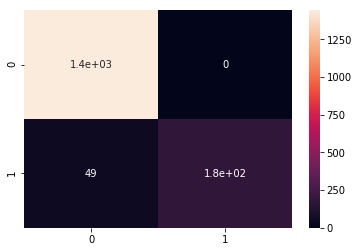

In [33]:
%matplotlib inline
cm = confusion_matrix(y_true=y_test, y_pred=pred)
sns.heatmap(data=cm, annot=True)